In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv("D:/ORAGAN.IST/Projects/Done/1st Month - January/Solar/solar1.csv")
df.head()

,Date,Voltage
0,11-09-23 0:00,4.000000
1,11-09-23 0:15,3.998793
2,11-09-23 0:30,3.999371
3,11-09-23 0:45,4.000000
4,11-09-23 1:00,3.997842


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     193 non-null    object 
 1   Voltage  193 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


In [49]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\NETHMI\AppData\Local\Temp\ipykernel_15864\2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [50]:
df.sort_values(by='Date', inplace=True)
df.reset_index(drop=True, inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     193 non-null    datetime64[ns]
 1   Voltage  193 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.1 KB


In [52]:
df['Voltage'].astype(float)

0      4.000000
1      3.998793
2      3.999371
3      4.000000
4      3.997842
         ...   
188    3.013438
189    3.031055
190    3.000000
191    3.007879
192    3.000000
Name: Voltage, Length: 193, dtype: float64

In [53]:
df['Voltage'] = df['Voltage'].astype(float)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     193 non-null    datetime64[ns]
 1   Voltage  193 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.1 KB


In [55]:
df.set_index('Date', inplace=True)

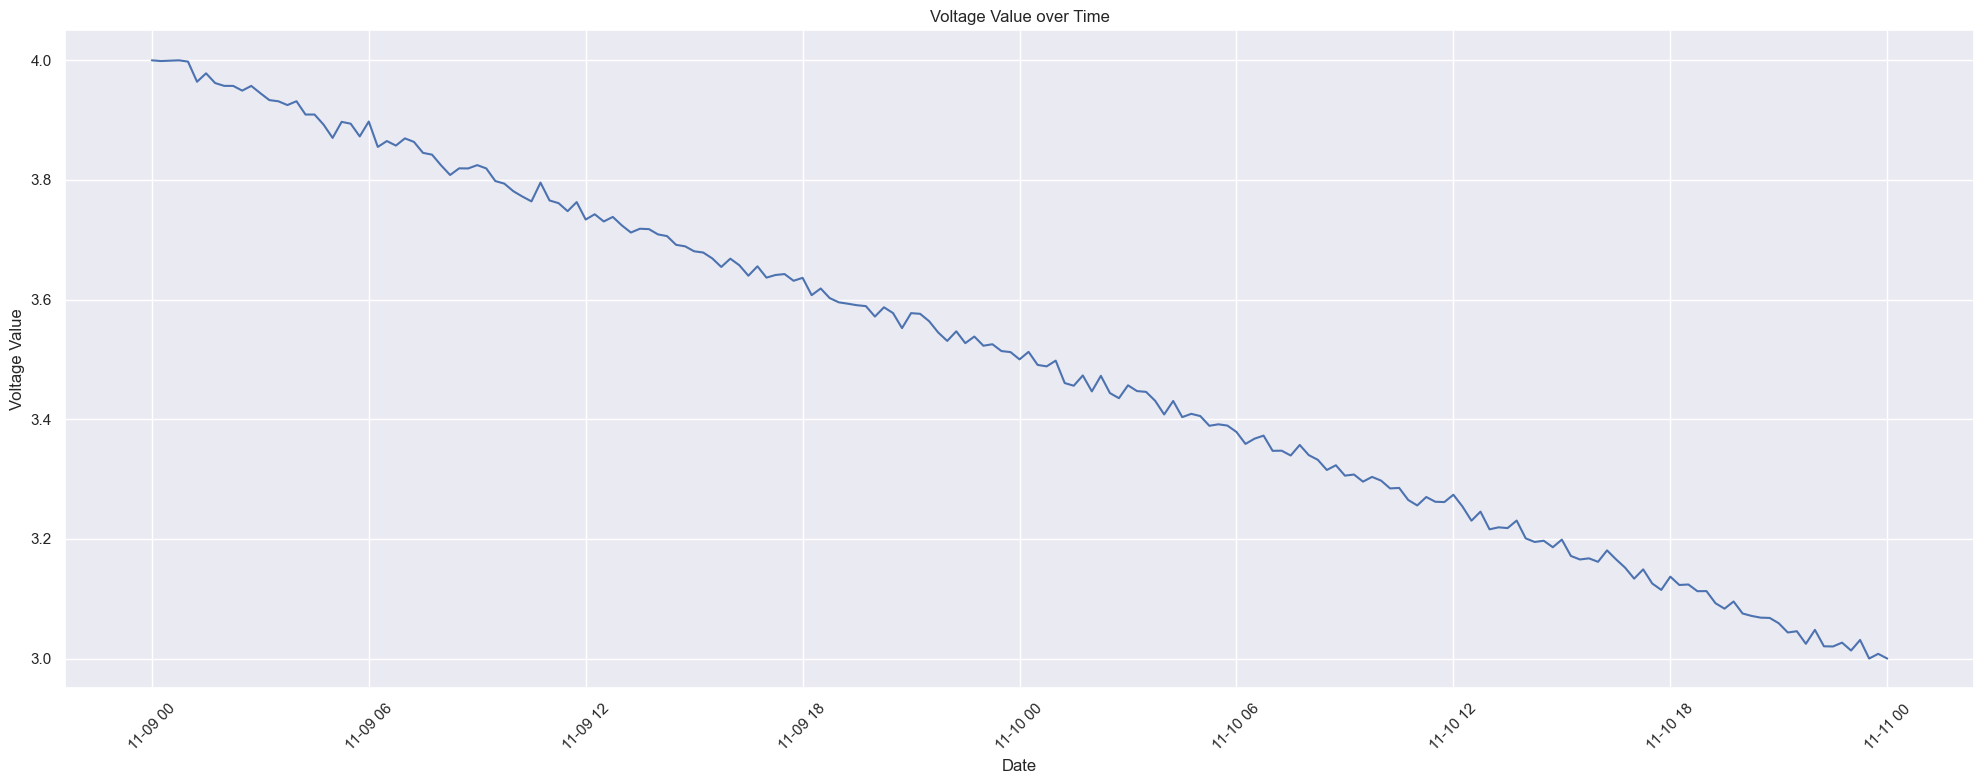

In [56]:
plt.figure(figsize=(20, 8))
plt.plot(df.index, df['Voltage'])
plt.xlabel('Date')
plt.ylabel('Voltage Value')
plt.title('Voltage Value over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
df.shape

(193, 1)

In [58]:
df.head()

,Voltage
Date,
2023-11-09 00:00:00,4.000000
2023-11-09 00:15:00,3.998793
2023-11-09 00:30:00,3.999371
2023-11-09 00:45:00,4.000000
2023-11-09 01:00:00,3.997842


In [59]:
train = df.iloc[:160]
test = df.iloc[160:]

In [60]:
df.shape

(193, 1)

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
scaler = MinMaxScaler()

In [63]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [64]:
scaled_train[:8]

array([[1.        ],
       [0.99855372],
       [0.99924581],
       [1.        ],
       [0.99741398],
       [0.95707716],
       [0.97393415],
       [0.95449149]])

In [65]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [66]:
n_input = 15
n_features = 1
genertor = TimeseriesGenerator(scaled_train,scaled_train,length = n_input ,batch_size = 1)

In [67]:
print(len(scaled_train),len(genertor))

160 145


In [68]:
X,y = genertor[0]
print(X.flatten())
print(y)

[1.         0.99855372 0.99924581 1.         0.99741398 0.95707716
 0.97393415 0.95449149 0.94882635 0.94874226 0.93930558 0.94876633
 0.93421597 0.92031128 0.91793056]
[[0.91036789]]


In [69]:
X.shape

(1, 15, 1)

In [70]:
n_input = 15
val_generator = TimeseriesGenerator(scaled_train,scaled_train,length = n_input ,batch_size = 1)

In [71]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [72]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.summary()
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 15, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 121301 (473.83 KB)
Trainable params: 121301 (473.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



In [73]:
history = model.fit(genertor,epochs = 35)

Epoch 1/35


145/145 [==============================] - 7s 10ms/step - loss: 0.0224 - accuracy: 0.0069
Epoch 2/35
145/145 [==============================] - 1s 9ms/step - loss: 0.0057 - accuracy: 0.0069
Epoch 3/35
145/145 [==============================] - 1s 9ms/step - loss: 0.0080 - accuracy: 0.0069
Epoch 4/35
145/145 [==============================] - 1s 9ms/step - loss: 0.0034 - accuracy: 0.0069
Epoch 5/35
145/145 [==============================] - 2s 11ms/step - loss: 0.0026 - accuracy: 0.0069
Epoch 6/35
145/145 [==============================] - 1s 9ms/step - loss: 0.0047 - accuracy: 0.0069
Epoch 7/35
145/145 [==============================] - 1s 9ms/step - loss: 0.0060 - accuracy: 0.0069
Epoch 8/35
145/145 [==============================] - 1s 10ms/step - loss: 0.0055 - accuracy: 0.0069
Epoch 9/35
145/145 [==============================] - 2s 12ms/step - loss: 0.0033 - accuracy: 0.0069
Epoch 10/35
145/145 [==============================] - 2s 10ms/step - loss: 0.0021 - accuracy:

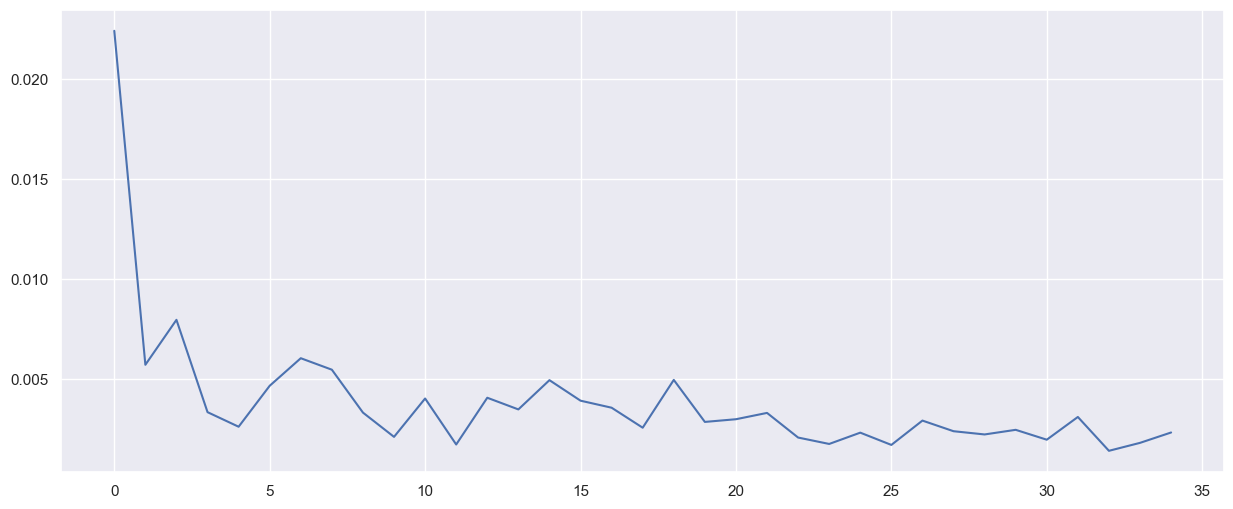

In [74]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [75]:
last_train_batch = scaled_train[-15:]

In [76]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [77]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 450ms/step


array([[-0.02683245]], dtype=float32)

In [78]:
scaled_test[0]

array([-0.0047008])

In [79]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 29ms/step


In [80]:
test_predictions

[array([-0.02683245], dtype=float32),
 array([-0.03577678], dtype=float32),
 array([-0.04435308], dtype=float32),
 array([-0.05460359], dtype=float32),
 array([-0.06398334], dtype=float32),
 array([-0.07427807], dtype=float32),
 array([-0.08502512], dtype=float32),
 array([-0.0970784], dtype=float32),
 array([-0.10801829], dtype=float32),
 array([-0.119204], dtype=float32),
 array([-0.13112606], dtype=float32),
 array([-0.14315502], dtype=float32),
 array([-0.15666537], dtype=float32),
 array([-0.16933389], dtype=float32),
 array([-0.18247284], dtype=float32),
 array([-0.19653319], dtype=float32),
 array([-0.21008764], dtype=float32),
 array([-0.22411095], dtype=float32),
 array([-0.2386557], dtype=float32),
 array([-0.25364023], dtype=float32),
 array([-0.269171], dtype=float32),
 array([-0.28522313], dtype=float32),
 array([-0.30179012], dtype=float32),
 array([-0.31887114], dtype=float32),
 array([-0.33661866], dtype=float32),
 array([-0.3550629], dtype=float32),
 array([-0.37423086

In [81]:
test.head(15)

,Voltage
Date,
2023-11-10 16:00:00,3.161686
2023-11-10 16:15:00,3.180754
2023-11-10 16:30:00,3.165744
2023-11-10 16:45:00,3.151917
2023-11-10 17:00:00,3.133579
2023-11-10 17:15:00,3.149069
2023-11-10 17:30:00,3.125415
2023-11-10 17:45:00,3.114761
2023-11-10 18:00:00,3.136880


In [82]:
true_predictions = scaler.inverse_transform(test_predictions)

In [83]:
test['Predictions'] = true_predictions

C:\Users\NETHMI\AppData\Local\Temp\ipykernel_15864\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [84]:
true_predictions

array([[3.14321989],
       [3.13575681],
       [3.12860082],
       [3.12004788],
       [3.1122215 ],
       [3.10363167],
       [3.09466442],
       [3.08460727],
       [3.07547912],
       [3.06614586],
       [3.0561982 ],
       [3.04616133],
       [3.03488842],
       [3.02431791],
       [3.01335489],
       [3.00162305],
       [2.99031334],
       [2.97861241],
       [2.96647639],
       [2.95397343],
       [2.94101469],
       [2.92762094],
       [2.91379758],
       [2.89954532],
       [2.88473695],
       [2.86934723],
       [2.85335365],
       [2.83666723],
       [2.8193116 ],
       [2.80118281],
       [2.78219183],
       [2.7622781 ],
       [2.74134543]])

<Axes: xlabel='Date'>

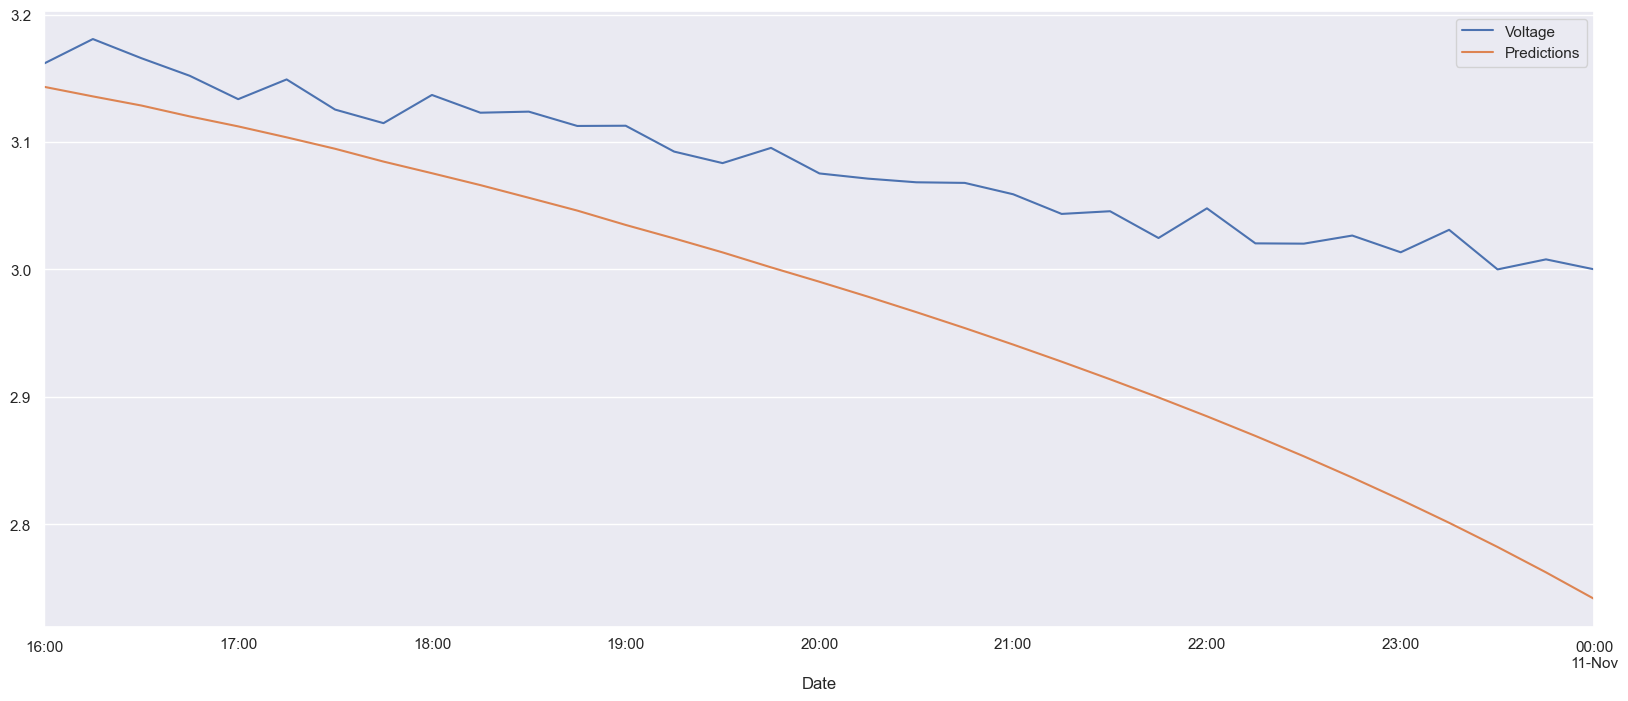

In [85]:
test.plot(figsize=(20, 8))

In [86]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [88]:
rmse = sqrt(mean_squared_error(test['Predictions'], test['Voltage']))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.12644222491421406


In [93]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test['Predictions'], test['Voltage'])
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 0.10677095216707591


In [94]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test['Predictions'], test['Voltage'])
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.015987636241256695


In [97]:
model.save('voltage_model.h5')

D:\Software\Anaconda\Software\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [92]:
model.save('my_model.keras')

In [98]:
last_input_batch = scaled_test[-n_input:]
last_input_batch = last_input_batch.reshape((1, n_input, n_features))

In [99]:
from datetime import datetime, timedelta

n_steps = 10

future_predictions = []

for i in range(n_steps):
    current_pred = model.predict(last_input_batch)[0]
    future_predictions.append(current_pred)
    last_input_batch = np.append(last_input_batch[:, 1:, :], [[current_pred]], axis=1)

1/1 [==============================] - 0s 24ms/step


In [100]:
future_predictions = scaler.inverse_transform(future_predictions)
future_predictions

array([[2.9453816 ],
       [2.93696016],
       [2.92672538],
       [2.91537896],
       [2.90300842],
       [2.88942503],
       [2.87552728],
       [2.85961954],
       [2.84402865],
       [2.8275345 ]])

In [101]:
from datetime import timedelta

last_timestamp = test.index[-2]

future_timestamps = [last_timestamp + timedelta(minutes=(i + 1) * 15) for i in range(n_steps)]

In [102]:
future_timestamps

[Timestamp('2023-11-11 00:00:00'),
 Timestamp('2023-11-11 00:15:00'),
 Timestamp('2023-11-11 00:30:00'),
 Timestamp('2023-11-11 00:45:00'),
 Timestamp('2023-11-11 01:00:00'),
 Timestamp('2023-11-11 01:15:00'),
 Timestamp('2023-11-11 01:30:00'),
 Timestamp('2023-11-11 01:45:00'),
 Timestamp('2023-11-11 02:00:00'),
 Timestamp('2023-11-11 02:15:00')]

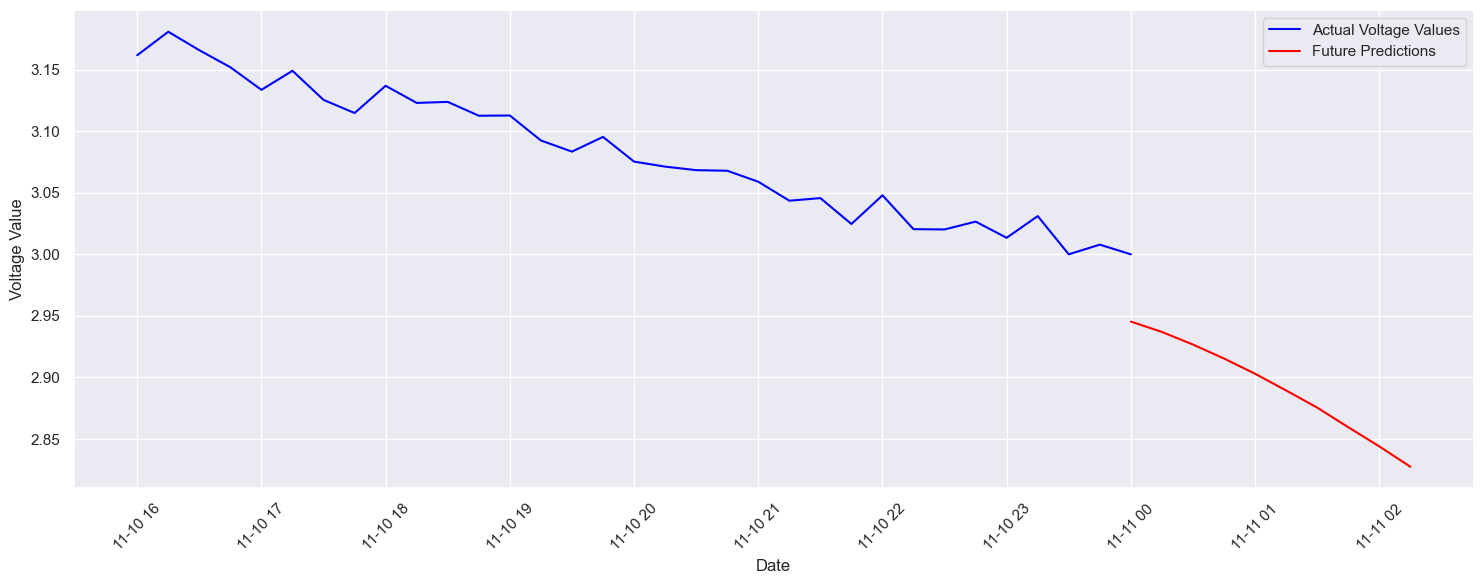

In [104]:
plt.plot(test.index, test['Voltage'], label='Actual Voltage Values', color='blue')
plt.plot(future_timestamps, future_predictions, label='Future Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Voltage Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()